In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
train_data = data.iloc[:,1:2].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
train_scal = sc.fit_transform(train_data)


In [31]:
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(train_scal[i-60:i,0])
    y_train.append(train_scal[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import LSTM

In [11]:
reg = Sequential()

W0407 01:04:11.775337  2252 deprecation_wrapper.py:119] From e:\pypro\venv\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [12]:
reg.add(LSTM(units= 50,  return_sequences= True, input_shape= (x_train.shape[1], 1)))
reg.add(Dropout(0.2))

W0407 01:06:02.722783  2252 deprecation_wrapper.py:119] From e:\pypro\venv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0407 01:06:03.019293  2252 deprecation_wrapper.py:119] From e:\pypro\venv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0407 01:06:03.967062  2252 deprecation_wrapper.py:119] From e:\pypro\venv\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0407 01:06:04.005092  2252 deprecation.py:506] From e:\pypro\venv\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Ra

In [13]:
reg.add(LSTM(units= 50,  return_sequences= True))
reg.add(Dropout(0.2))

In [14]:
reg.add(LSTM(units= 50,  return_sequences= True))
reg.add(Dropout(0.2))

In [15]:
reg.add(LSTM(units= 50))
reg.add(Dropout(0.2))

In [16]:
reg.add(Dense(units = 1))

In [17]:
reg.compile(optimizer='adam', loss='mean_squared_error')

W0407 01:08:48.618912  2252 deprecation_wrapper.py:119] From e:\pypro\venv\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [33]:
reg.fit(x_train, y_train, epochs=300, batch_size=32)

Epoch 1/300
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0030
Epoch 2/300
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0029
Epoch 3/300
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0030
Epoch 4/300
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0027
Epoch 5/300
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0027
Epoch 6/300
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0028
Epoch 7/300
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0027
Epoch 8/300
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0027
Epoch 9/300
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0024
Epoch 10/300
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0027
Epoch 11/300
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0026
Epoch 12/300
1198/1198 [==============================] - 5s 4ms/step - l

1198/1198 [==============================] - 8s 7ms/step - loss: 0.0012
Epoch 98/300
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0013
Epoch 99/300
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0011
Epoch 100/300
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0012
Epoch 101/300
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0011
Epoch 102/300
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0011
Epoch 103/300
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0013
Epoch 104/300
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0012
Epoch 105/300
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0011
Epoch 106/300
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0012
Epoch 107/300
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015
Epoch 108/300
1198/1198 [==============================] - 7s 6ms/step

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0010
Epoch 191/300
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0011
Epoch 192/300
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0010
Epoch 193/300
1198/1198 [==============================] - 7s 6ms/step - loss: 9.5419e-04
Epoch 194/300
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0010- E
Epoch 195/300
1198/1198 [==============================] - 6s 5ms/step - loss: 8.5108e-04
Epoch 196/300
1198/1198 [==============================] - 6s 5ms/step - loss: 9.6912e-04
Epoch 197/300
1198/1198 [==============================] - 6s 5ms/step - loss: 9.7631e-04
Epoch 198/300
1198/1198 [==============================] - 6s 5ms/step - loss: 9.7885e-04
Epoch 199/300
1198/1198 [==============================] - 7s 6ms/step - loss: 9.4477e-04
Epoch 200/300
1198/1198 [==============================] - 8s 7ms/step - loss: 9.9513e-04
Epoch 201/300
1198/1198 [============

1198/1198 [==============================] - 7s 6ms/step - loss: 9.7504e-04A: 4s  - ETA: 0s - loss: 9.597
Epoch 281/300
1198/1198 [==============================] - 7s 6ms/step - loss: 9.2187e-04A: 2s - loss
Epoch 282/300
1198/1198 [==============================] - 7s 6ms/step - loss: 8.7278e-04A: 0s - loss: 8.8368
Epoch 283/300
1198/1198 [==============================] - 7s 6ms/step - loss: 9.1564e-04
Epoch 284/300
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0010
Epoch 285/300
1198/1198 [==============================] - 7s 6ms/step - loss: 8.5681e-04
Epoch 286/300
1198/1198 [==============================] - 7s 6ms/step - loss: 8.9191e-04A: 
Epoch 287/300
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0010
Epoch 288/300
1198/1198 [==============================] - 7s 6ms/step - loss: 9.1225e-04
Epoch 289/300
1198/1198 [==============================] - 7s 6ms/step - loss: 8.5033e-04
Epoch 290/300
1198/1198 [==============================] 

In [34]:
data_test= pd.read_csv('Google_Stock_Price_Test.csv')
real = data_test.iloc[:,1:2].values

In [35]:
data_ttl = pd.concat((data['Open'], data_test['Open']), axis=0)
inputs = data_ttl[len(data_ttl) - len(data_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [36]:
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
    
x_test= np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [37]:
pred = reg.predict(x_test)

In [38]:
pred = sc.inverse_transform(pred)

W0407 02:04:57.357546  2252 legend.py:1282] No handles with labels found to put in legend.


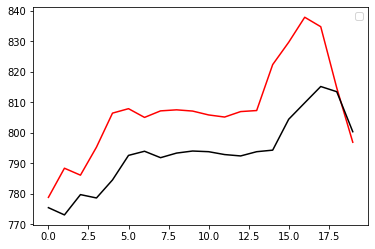

In [39]:
plt.plot(real, color='red')
plt.plot(pred, color='black')
plt.legend()
plt.show()